In [1]:
import matplotlib.colors as cl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from itertools import combinations

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import make_scorer, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
path = '/Users/rodrigovillatoro/Documents/Harbour.Space/07_ml_1/harbourspace-ml/data'
iris_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
boston_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
# Load data
iris = pd.read_csv(path + '/iris/iris.data.txt', header=None, names=iris_names)
boston = pd.read_csv(path + '/boston/housing.data.txt', header=None, sep=('\s+'), names=boston_names)
titanic = pd.read_csv(path + '/titanic/train.csv')

----------------------------------------------------
----------------------------------------------------

# IRIS
----------------------------------------------------
----------------------------------------------------

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 5)

In [6]:
# Separate features and target
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1].astype('category')

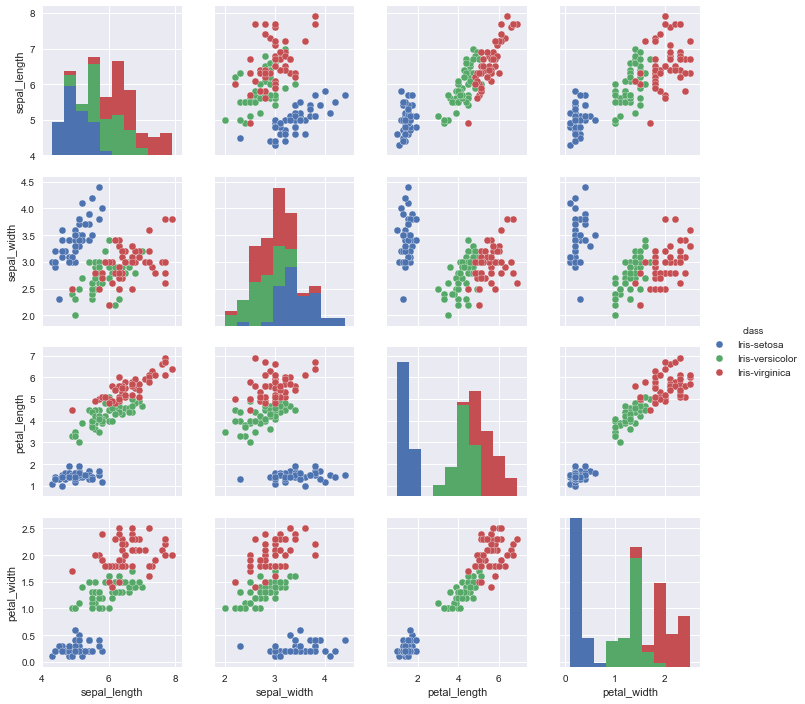

In [7]:
sns.pairplot(iris, hue='class')
plt.show()

### From the plot above we can see that classes can be sepparated by almost any combination of features, with the exception of sepal_width and sepal_length

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### LOGISTIC REGRESSION

#### If we use all of the features, with the out of the box logistic regression, we get almost 84 percent accuracy. 

In [9]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.84210526315789469

#### Let's try to see what happens if we include less features, since some of them might be redundant. First, let's get all possible combinations of two features...

In [10]:
feature_combinations = list(combinations(iris_names[:-1], 2))

#### And let's see what score they get if we only use these two features

In [11]:
for fc in feature_combinations:
    clf = LogisticRegression()
    clf.fit(X_train[list(fc)], y_train)
    print('features', fc)
    print('score', clf.score(X_test[list(fc)], y_test))
    print('\n')

features ('sepal_length', 'sepal_width')
score 0.605263157895


features ('sepal_length', 'petal_length')
score 0.763157894737


features ('sepal_length', 'petal_width')
score 0.736842105263


features ('sepal_width', 'petal_length')
score 0.710526315789


features ('sepal_width', 'petal_width')
score 0.763157894737


features ('petal_length', 'petal_width')
score 0.684210526316




#### We see that if we only took two features, for example sepal_length and petal_length we already have score of 0.76%. Let's see if we can improve by only using these two features.

In [12]:
features = ['sepal_length', 'petal_length']

In [13]:
# Base case
clf = LogisticRegression(C=1)
clf.fit(X_train[features], y_train)
predictions = clf.predict(X_test[features])
print('score: ', clf.score(X_test[features], y_test))
print(confusion_matrix(y_test, predictions, labels=y.cat.categories))

score:  0.763157894737
[[13  0  0]
 [ 0  7  9]
 [ 0  0  9]]


### NEAREST NEIGHBORS

In [14]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train[features], y_train)
predictions = clf.predict(X_test[features])
print('score: ', clf.score(X_test[features], y_test))
print(confusion_matrix(y_test, predictions, labels=y.cat.categories))

score:  0.947368421053
[[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]


#### By using a nearest neighbors classifier with n=5 we see that the accurracy of the model improved to 94, by using only two features

----------------------------------------------------
----------------------------------------------------

# BOSTON
----------------------------------------------------
----------------------------------------------------

In [15]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
boston.shape

(506, 14)

In [17]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
X = boston.iloc[:, :-1]
y = boston.iloc[:, -1]

In [19]:
columns = X.columns

## Data Exploration

### First, lets explore the data by ploting the expected value of the house to just one feature to understand which features have more predictive power by themselves.

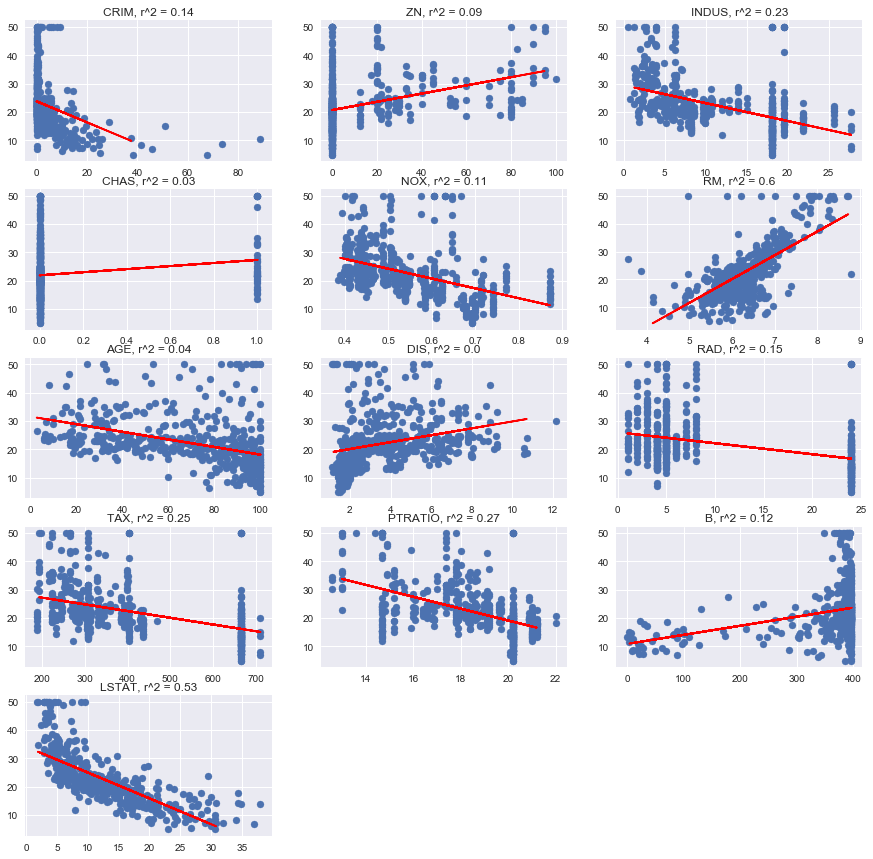

In [20]:
fig = plt.figure(figsize=(15, 15))
for i in range(len(columns)):
    
    x = X[columns[i]]
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)
    
    regressor = LinearRegression()
    regressor.fit(X_train.values.reshape(-1, 1), y_train)
    predictions = regressor.predict(X_test.values.reshape(-1, 1))
    r_squared = round(regressor.score(X_test.values.reshape(-1, 1), y_test), 2)
    
    ax = fig.add_subplot(5, 3, i + 1)
    ax.set_title('{}, r^2 = {}'.format(columns[i], r_squared))
    ax.scatter(x, y)
    ax.plot(X_test, predictions, color='red')
    
    
plt.show()

#### It is intersting to see that there is one 0-1 variable CHAS, which might be useful for something like a decision tree regressor, but by itself it does not provide much information. 

### Lets try to see the correlation between variables

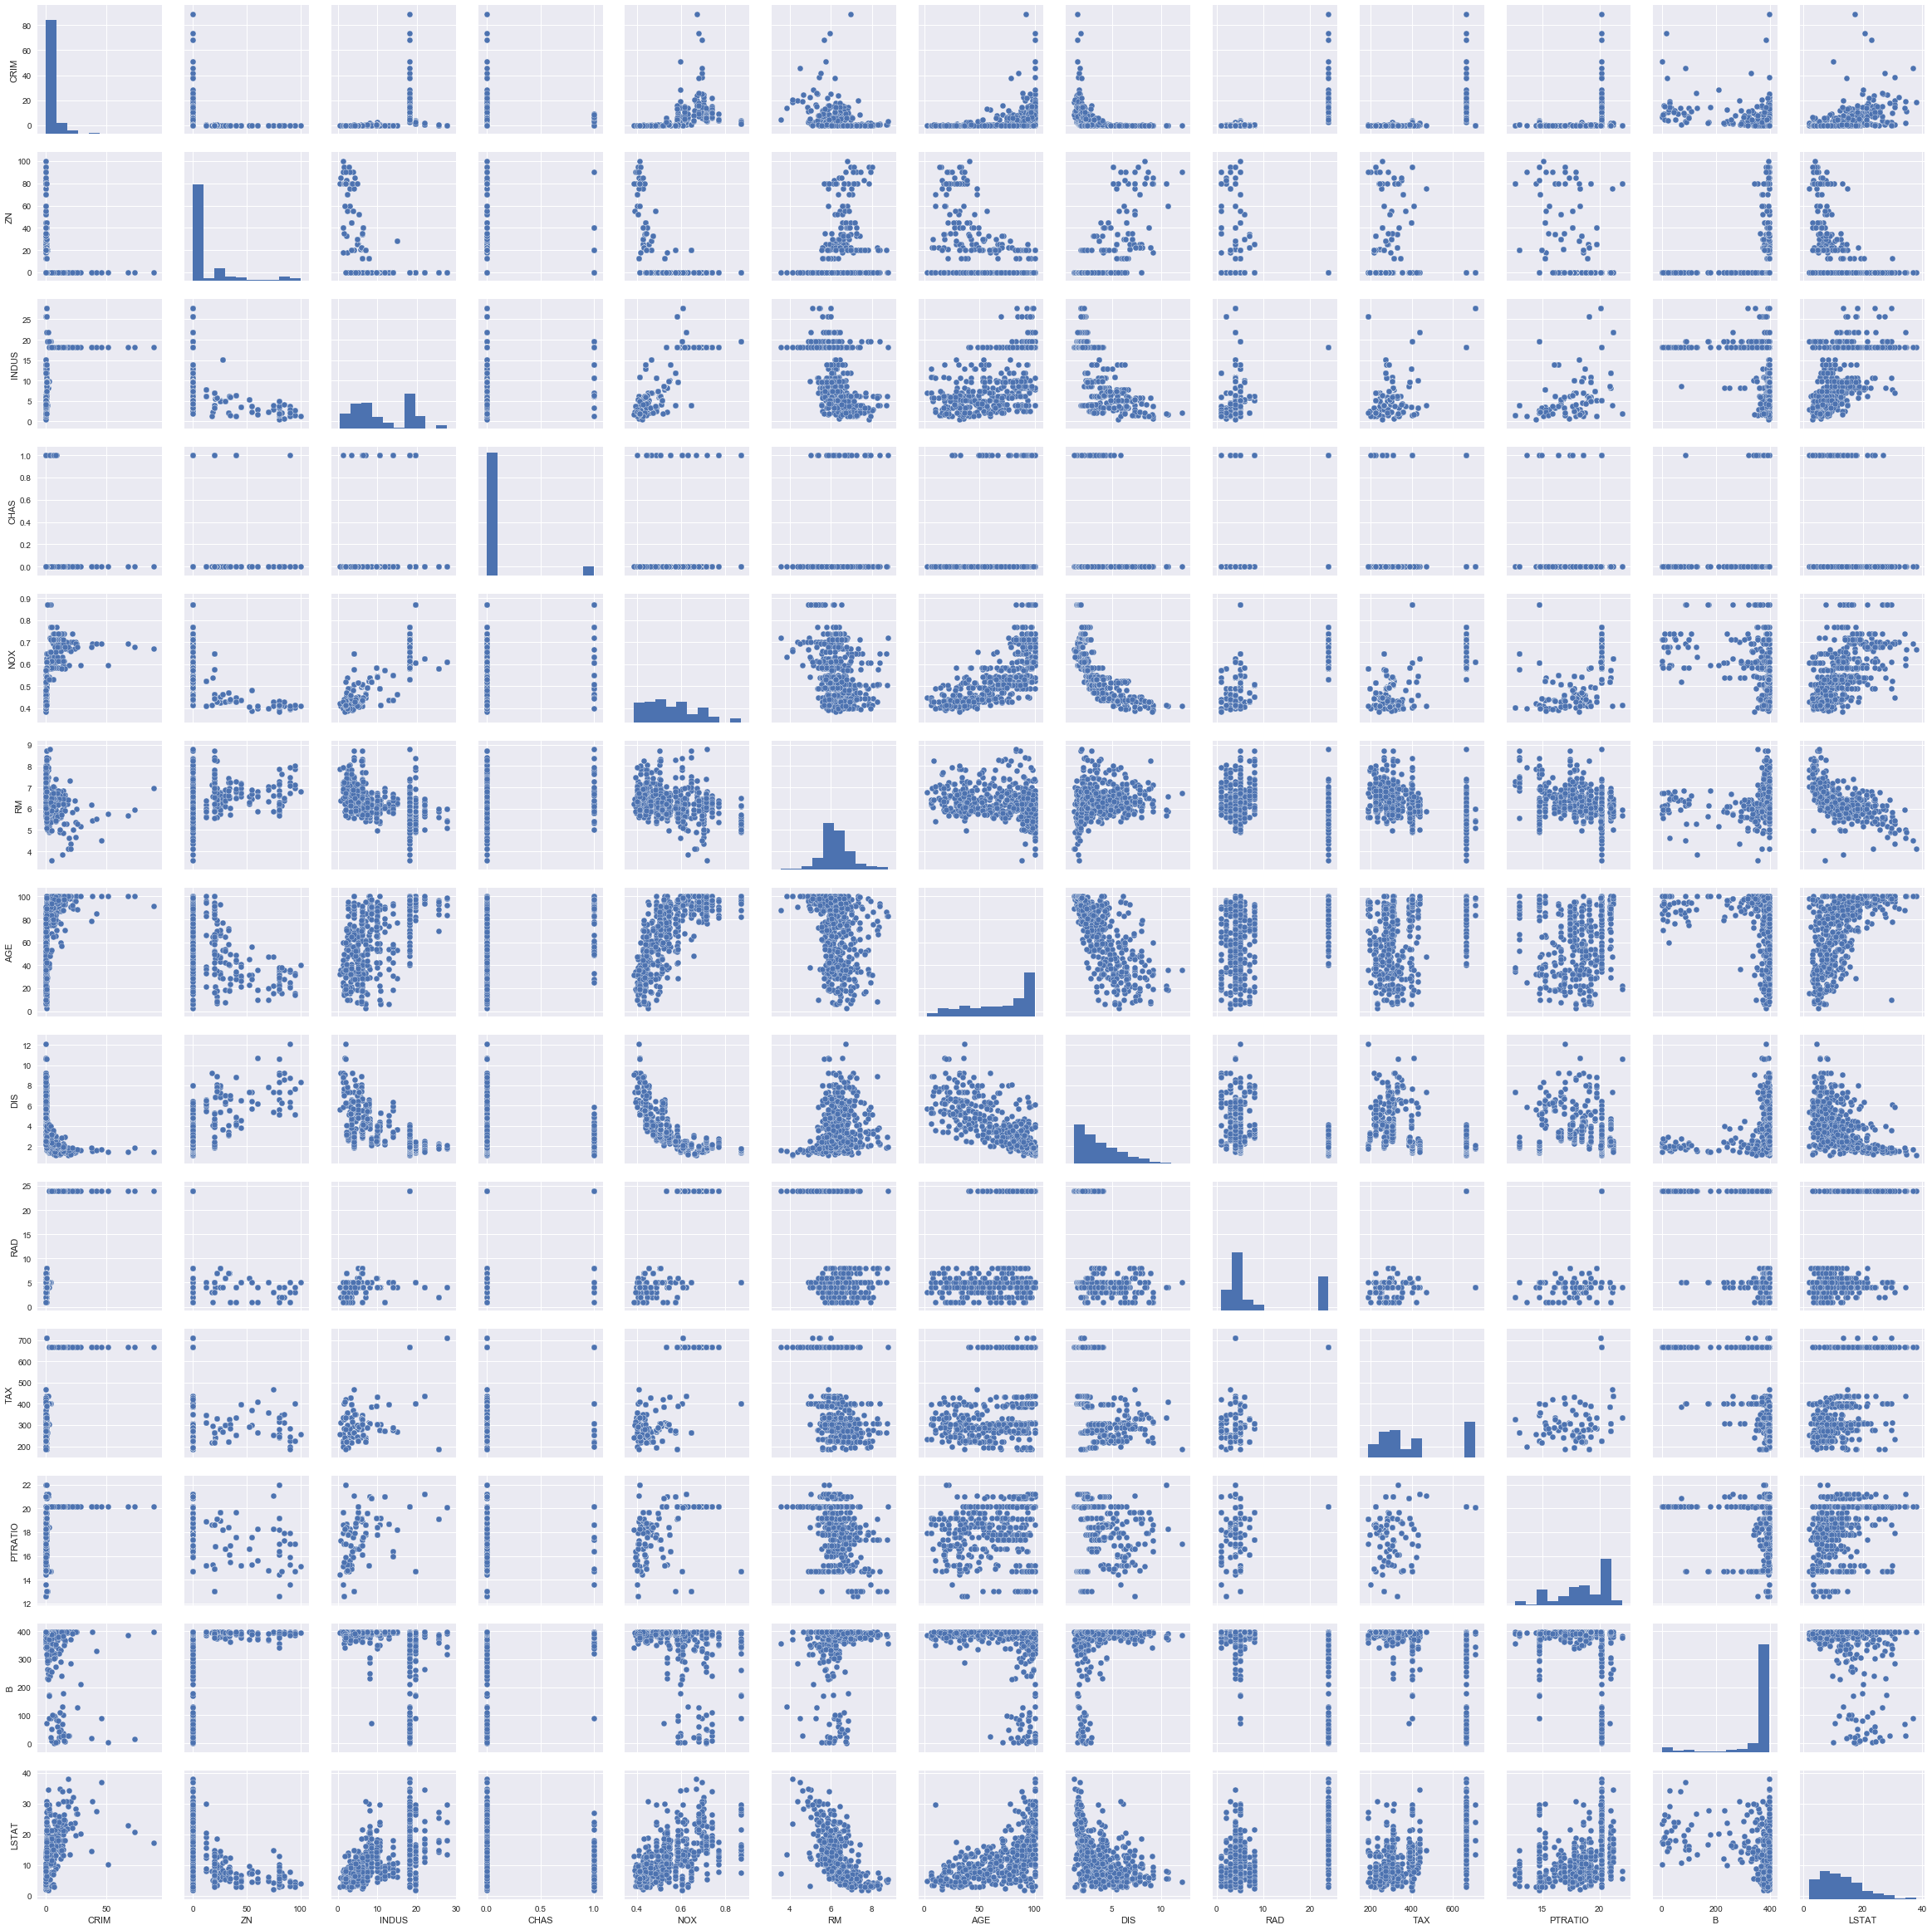

In [21]:
sns.pairplot(X)
plt.show()

### Wow, there is too much info. But we can see that there are a few variables that seem to be correlated, for example AGE and DIS, or LSTAT and RM. We need to watch out since some features might be redundant.

### Just for fun, let's try to run linear regression with all the features:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.77894101726229603

#### 78%, not bad. Let's see what happens if we do the regression with only three features

In [24]:
selected_features = ['RM', 'LSTAT', 'PTRATIO']

In [25]:
X_selected = X[selected_features]

In [26]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_selected, y, random_state=1)

In [27]:
reg = LinearRegression()
reg.fit(Xs_train, ys_train)
reg.score(Xs_test, ys_test)

0.72083024946716845

In [28]:
ordered_features = ['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'CRIM', 'B', 'NOX', 'ZN', 'AGE', 'CHAS', 'DIS']

#### Let's do it in a more ordered way, and plot the results. 

In [29]:
for i in range(2, len(ordered_features) + 1):
    print(ordered_features[:i])

['RM', 'LSTAT']
['RM', 'LSTAT', 'PTRATIO']
['RM', 'LSTAT', 'PTRATIO', 'TAX']
['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']
['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS', 'RAD']
['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'CRIM']
['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'CRIM', 'B']
['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'CRIM', 'B', 'NOX']
['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'CRIM', 'B', 'NOX', 'ZN']
['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'CRIM', 'B', 'NOX', 'ZN', 'AGE']
['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'CRIM', 'B', 'NOX', 'ZN', 'AGE', 'CHAS']
['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS', 'RAD', 'CRIM', 'B', 'NOX', 'ZN', 'AGE', 'CHAS', 'DIS']


In [30]:
scores = []
for i in range(1, len(ordered_features) + 1):
    X_new = X[ordered_features[:i]]
    
    Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_new, y, random_state=1)
    
    reg = LinearRegression()
    
    if i == 1:
        reg.fit(Xn_train.values.reshape(-1, 1), yn_train)
        score = reg.score(Xn_test.values.reshape(-1, 1), yn_test)
    else:
        reg.fit(Xn_train, yn_train)
        score = reg.score(Xn_test, yn_test)
        
    scores.append(score)

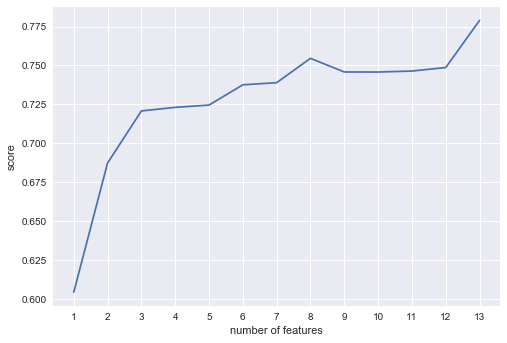

In [31]:
plt.plot(range(1, 14), scores)
plt.ylabel('score')
plt.xticks(range(1, 14))
plt.xlabel('number of features')
plt.show()

### we can see that as we add more features, the score increases, but it makes our model more complicated. It's also interesting to note that the feature D (distance to employment centers) by itself it did not have much predictive power, but in combination with other variables, it improves the score by 2.5 points. Either way, the optimal number of features appear to be at around 3-5. Let's continue the analysis with the original 3 features we selected before...

In [32]:
selected_features = ['RM', 'LSTAT', 'PTRATIO']

### Now, let's do a polynomial regression with different degrees

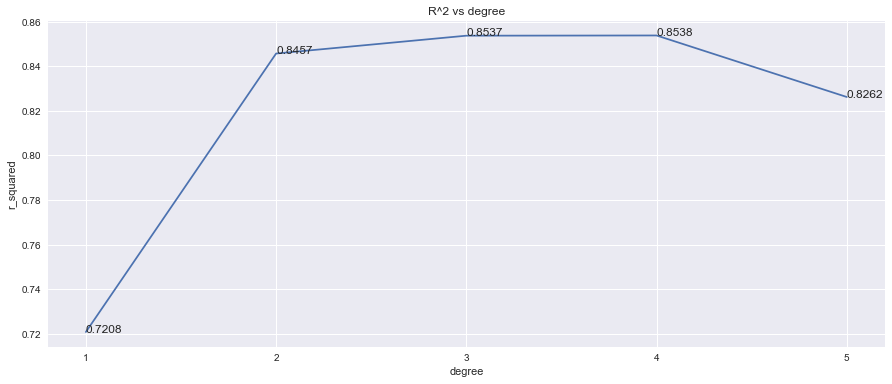

In [33]:
degrees = range(1, 6)
scores = []

for i, num in enumerate(degrees):
      
    poly = PolynomialFeatures(num)
    transformed = poly.fit_transform(X[selected_features])

    Xt_train, Xt_test, yt_train, yt_test = train_test_split(transformed, y, random_state=1)
    
    regressor = LinearRegression()
    regressor.fit(Xt_train, yt_train)
    r_squared = round(regressor.score(Xt_test, yt_test), 4)
    scores.append(r_squared)
    
plt.figure(figsize=(15, 6))

plt.title('R^2 vs degree')
plt.plot(degrees, scores)
plt.xticks([1, 2, 3, 4, 5])
plt.ylabel('r_squared')
plt.xlabel('degree')

for i, xy in enumerate(zip(degrees, scores)):
    plt.annotate('{}'.format(scores[i]), xy)

plt.show()

### Having a two degree polynomial, we are able to improve the score from 0.72 to 0.85. As we increase the degree to 3 or 4, we see that the improvement is already too small. Degree 5 starts having less predictive power. 

## Decision Tree Regressor

In [34]:
reg = DecisionTreeRegressor(random_state=1)
params = {'max_depth': range(1, 11)}
scoring_fnc = make_scorer(r2_score)
grid = GridSearchCV(reg, params, scoring=scoring_fnc)
grid.fit(X_train, y_train)
grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

### By using grid search, we see that the best estimator max_depth for this tree is 4

In [35]:
reg = DecisionTreeRegressor(max_depth=4, random_state=1)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.86042319038229753

### We see that by using all the features, the score is of 0.86... What happens if we use only the selected features?

In [36]:
reg = DecisionTreeRegressor(random_state=1)
params = {'max_depth': range(1, 11)}
scoring_fnc = make_scorer(r2_score)
grid = GridSearchCV(reg, params, scoring=scoring_fnc)
grid.fit(X_train[selected_features], y_train)
grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [37]:
reg = DecisionTreeRegressor(max_depth=4, random_state=1)
reg.fit(X_train[selected_features], y_train)
reg.score(X_test[selected_features], y_test)

0.85699593506117744

### Again, we see that we have a very good estimate when using only 3 features, instead of all the features.

---
### Now, let's combine the two models to get an average prediction, to see if we can improve the results... and let's do regression only on the 3 selected features to compare apples with apples

## ENSEMBLE OF MODELS

In [38]:
class AveragePredictor(BaseEstimator, RegressorMixin):
    
    def __init__(self, regressors=[LinearRegression(), DecisionTreeRegressor(max_depth=4, random_state=1)]):
        self.regressors = regressors
        self.degrees = 2
        
    def fit(self, X, y=None):
        
        self.fitted_regressors_ = []
    
        for reg in self.regressors:
            
            if type(reg) == LinearRegression:
                poly = PolynomialFeatures(self.degrees)
                transformed = poly.fit_transform(X[selected_features])
                reg = reg.fit(transformed, y)
            else: 
                reg = reg.fit(X, y)
            
            self.fitted_regressors_.append(reg)
            
        return self
    
    def predict(self, X, y=None):
        
        try:
            getattr(self, "fitted_regressors_")
        except AttributeError:
            raise RuntimeError("You must train the regressor before predicting data!")

        predictions = []
        
        for reg in self.fitted_regressors_:
            
            if type(reg) == LinearRegression:
                poly = PolynomialFeatures(self.degrees)
                transformed = poly.fit_transform(X[selected_features])
                reg = reg.predict(transformed)
            else: 
                reg = reg.predict(X)
            
            predictions.append(np.array(reg))
        
        return (predictions[0] + predictions[1]) / 2
    
    def score(self, X, y=None):
        pass
        

In [39]:
reg = AveragePredictor()
reg.fit(X_train[selected_features], y_train)
predictions = reg.predict(X_test[selected_features])

In [40]:
r2_score(y_test, predictions)

0.86949564913676469

### We can see that that with the ensemble we actualy improve a bit more than a point..
**Regressor** | **Params** | **Score**
--- | --- | ---
LinearRegression | degrees = 2 | 0.8453 
DecissionTreeRegressor | max_depth = 4 | 0.8570
AveragePredictor (Ensemble) | degrees = 2, max_depth = 4 | 0.8695

----------------------------------------------------
----------------------------------------------------

# TITANIC

----------------------------------------------------
----------------------------------------------------



In [41]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
titanic.shape

(891, 12)

In [43]:
# See null values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### There appears to be a lot of null values in Cabin. Let's drop this column, as well as the Name, Ticket, Fare, and PassengerID, since this will not be usefull for classification. Then let's drop rows that have  NaN for Age and Embarked

In [44]:
titanic = titanic.drop(['Cabin', 'PassengerId', 'Ticket', 'Fare', 'Name'], axis=1)

In [45]:
titanic = titanic.dropna()

In [46]:
titanic.shape

(712, 7)

In [47]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [48]:
# Convert sex to 0 1
sex = {
    'male': 0, 
    'female': 1
}
titanic['Sex'] = titanic['Sex'].replace(sex)

In [49]:
embarked = pd.get_dummies(titanic['Embarked'], prefix='embarked')

In [50]:
titanic = titanic.drop(['Embarked'], axis=1).join([embarked])

In [51]:
X = titanic.iloc[:, 1:]
y = titanic.iloc[:, 0]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## DECISION TREE CLASSIFIER

In [53]:
clf = DecisionTreeClassifier(random_state=1)
params = {'max_depth': range(1, 11), 'min_samples_split': range(2, 10)}
scoring_fnc = make_scorer(accuracy_score)
grid = GridSearchCV(clf, params, scoring=scoring_fnc)
grid.fit(X_train, y_train)
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best')

In [54]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7808988764044944

### Accuracy of 78%

## SVM

### Let's try SVM since we only have two classes

In [55]:
params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': range(1, 3),
    'C': [10, 1, 0.1, 0.01]
}

clf = SVC()
scoring_fnc = make_scorer(accuracy_score)
grid = GridSearchCV(clf, params, scoring=scoring_fnc)
grid.fit(X_train, y_train)
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
clf = SVC(kernel='poly')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7808988764044944

### Were really slow in general, and in this case it looks the same as the decision tree classifier, which is very suspicious... :/